In [2]:
# Import packages (Makes life easier).
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Hyper-parameter
epochs = 10
learning_rate = 0.0029999
batch_size = 4

In [13]:
# The images in the dataset are PILImage images of range(0, 1)
# We load the data and then, transform the images to tensors of normalised range(-1, 1)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=False)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=False)

In [14]:
# Load the training and testing data chunks into batches with the Dataloader class.
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

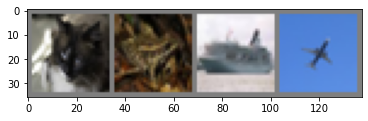

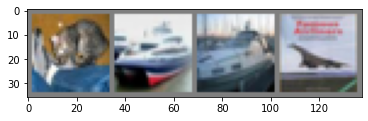

In [15]:
# Visualize the image samples
def imshow(img):
    img = img / 2 + 0.5 # unnormalize the images
    npimg = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()
        
samples = iter(train_loader)
images, labels = samples.next()
imshow(torchvision.utils.make_grid(images))
samples1 = iter(test_loader)
images1, labels1 = samples1.next()
imshow(torchvision.utils.make_grid(images1))

In [16]:
# Image classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [17]:
# We create a customised model
class CNNet(nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 199)
        self.fc2 = nn.Linear(199, 99)
        self.fc3 = nn.Linear(99, 10)
        
    
    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = torch.relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
# Initialize the model, and define the loss function and optimizer.
model = CNNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# Training loop
n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images.to(device)
        labels.to(device)
        
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # We'll print some information as the model is training
        if (i+1) % 12500 == 0:
            print(f'Epoch: {epoch+1}/{epochs}, Step: {i+1}/{n_total_steps} Loss: {loss:.4f}')
print('Finished training')

Epoch: 1/10, Step: 12500/12500 Loss: 1.7413
Epoch: 2/10, Step: 12500/12500 Loss: 1.5638
Epoch: 3/10, Step: 12500/12500 Loss: 2.6097
Epoch: 4/10, Step: 12500/12500 Loss: 0.8309
Epoch: 5/10, Step: 12500/12500 Loss: 1.7453
Epoch: 6/10, Step: 12500/12500 Loss: 1.5881
Epoch: 7/10, Step: 12500/12500 Loss: 1.0979
Epoch: 8/10, Step: 12500/12500 Loss: 0.2234
Epoch: 9/10, Step: 12500/12500 Loss: 1.5060
Epoch: 10/10, Step: 12500/12500 Loss: 1.3720
Finished training


In [20]:
# Model evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0.0 for i in range(10)]
    n_class_samples = [0.0 for i in range(10)]
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted==labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label==pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.00 * (n_correct/n_samples)
    print(f"Model's accuracy: {acc}%")
    
    for i in range(10):
        acc = 100.00 * (n_class_correct[i]/n_class_samples[i])
        print(f"Accuracy of {classes[i]}: {acc}%")

Model's accuracy: 64.51%
Accuracy of plane: 74.8%
Accuracy of car: 67.30000000000001%
Accuracy of bird: 57.49999999999999%
Accuracy of cat: 55.2%
Accuracy of deer: 67.30000000000001%
Accuracy of dog: 36.199999999999996%
Accuracy of frog: 74.4%
Accuracy of horse: 64.60000000000001%
Accuracy of ship: 75.7%
Accuracy of truck: 72.1%


In [ ]:
# ifunanyaScript